In [79]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# import all the datasets
data = pd.read_csv("../input/data.csv", encoding="ISO-8859-1")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [80]:
# check null values
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [81]:
# describe our data
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [82]:
data.query('Quantity < -80000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [83]:
# We will keep only positive quantity as it's not possible to have neagtive quantity
data.query('Quantity > 80000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [84]:
# We will do quantity sum 
basket = data.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack()
basket.shape

(24446, 4223)

We need to transform our data before applying apriori algorithm. If user has taken that item mark as 1 else he has not taken 0.


In [85]:
# This step will complete the one hot encoding of the data
basket = basket.applymap(lambda x: 1 if x>0 else 0)

In [86]:
# call apriori function and pass minimum support and it will generate frequent itemsets using two step approch
FreqItemsets = apriori(basket, min_support = 0.005, use_colnames = True)
FreqItemsets.head(10)

,support,itemsets
0,0.005277,( 50'S CHRISTMAS GIFT BAG LARGE)
1,0.007118,( DOLLY GIRL BEAKER)
2,0.006422,( OVAL WALL MIRROR DIAMANTE )
3,0.011004,( SET 2 TEA TOWELS I LOVE LONDON )
4,0.007527,( SPACEBOY BABY GIFT SET)
5,0.013008,(10 COLOUR SPACEBOY PEN)
6,0.006668,(12 COLOURED PARTY BALLOONS)
7,0.006054,(12 IVORY ROSE PEG PLACE SETTINGS)
8,0.010268,(12 MESSAGE CARDS WITH ENVELOPES)
9,0.014522,(12 PENCIL SMALL TUBE WOODLAND)


In [88]:
# we have association rules which need to put on frequent itemset
AssociRules = association_rules(FreqItemsets, metric="lift", min_threshold=1)
AssociRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( DOLLY GIRL BEAKER),(SPACEBOY BEAKER),0.007118,0.007527,0.005072,0.712644,94.680910,0.005019,3.453807
1,(SPACEBOY BEAKER),( DOLLY GIRL BEAKER),0.007527,0.007118,0.005072,0.673913,94.680910,0.005019,3.044839
2,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.014808,0.014522,0.005441,0.367403,25.300117,0.005226,1.557830
3,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE RED RETROSPOT),0.014522,0.014808,0.005441,0.374648,25.300117,0.005226,1.575419
4,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.014808,0.014522,0.006136,0.414365,28.533966,0.005921,1.682751
5,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.014522,0.014808,0.006136,0.422535,28.533966,0.005921,1.706064
6,(3 PIECE SPACEBOY COOKIE CUTTER SET),(GINGERBREAD MAN COOKIE CUTTER),0.015463,0.027407,0.005154,0.333333,12.162189,0.004730,1.458889
7,(GINGERBREAD MAN COOKIE CUTTER),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.027407,0.015463,0.005154,0.188060,12.162189,0.004730,1.212574
8,(SET OF 3 BUTTERFLY COOKIE CUTTERS),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.028144,0.015463,0.005850,0.207849,13.441991,0.005414,1.242865
9,(3 PIECE SPACEBOY COOKIE CUTTER SET),(SET OF 3 BUTTERFLY COOKIE CUTTERS),0.015463,0.028144,0.005850,0.378307,13.441991,0.005414,1.563241


In [89]:
AssociRules.shape

(33050, 9)

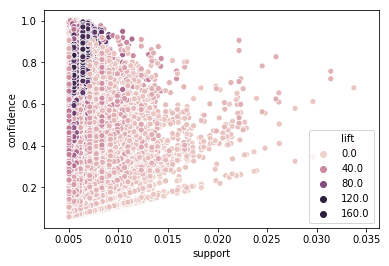

In [90]:
sns.scatterplot(x='support', y='confidence', hue='lift', data=AssociRules)
plt.show()

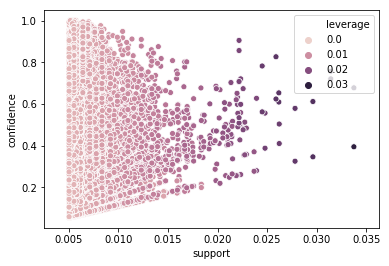

In [91]:
sns.scatterplot(x='support', y='confidence', hue='leverage', data=AssociRules)
plt.show()

In [92]:
AssociRules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32886,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP...","(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.006913,0.006627,0.005522,0.798817,120.542406,0.005477,4.937649
32903,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP...",0.006627,0.006913,0.005522,0.833333,120.542406,0.005477,5.958521
32948,"(HERB MARKER BASIL, HERB MARKER CHIVES , HERB ...","(HERB MARKER PARSLEY, HERB MARKER THYME, HERB ...",0.006995,0.007936,0.006422,0.918129,115.693676,0.006367,12.117355
32965,"(HERB MARKER PARSLEY, HERB MARKER THYME, HERB ...","(HERB MARKER BASIL, HERB MARKER CHIVES , HERB ...",0.007936,0.006995,0.006422,0.809278,115.693676,0.006367,5.206567
32898,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(REGENCY TEA PLATE ROSES , GREEN REGENCY TEACU...",0.007118,0.006750,0.005522,0.775862,114.949843,0.005474,4.431425
32891,"(REGENCY TEA PLATE ROSES , GREEN REGENCY TEACU...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.006750,0.007118,0.005522,0.818182,114.949843,0.005474,5.460852
32916,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP...",0.007486,0.006422,0.005522,0.737705,114.865824,0.005474,3.788015
32873,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP...","(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...",0.006422,0.007486,0.005522,0.859873,114.865824,0.005474,7.082942
32969,"(HERB MARKER CHIVES , HERB MARKER ROSEMARY)","(HERB MARKER BASIL, HERB MARKER THYME, HERB MA...",0.007731,0.007240,0.006422,0.830688,114.728784,0.006366,5.863486
32944,"(HERB MARKER BASIL, HERB MARKER THYME, HERB MA...","(HERB MARKER CHIVES , HERB MARKER ROSEMARY)",0.007240,0.007731,0.006422,0.887006,114.728784,0.006366,8.781578
